# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
# Import necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
import scipy.stats
import math

In [2]:
# Read in .csv file
df = pd.read_csv('human_body_temperature.csv')

# Q1: Is the distribution of body temperatures normal?

This question is important because it is a condition to satisfy the CLT, and the tests we will use. Let's get to know our data a little better, and determined whether we can assume our underlying data is normal by two methods.

## Method #1

In [3]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [4]:
df.dtypes

temperature    float64
gender          object
heart_rate     float64
dtype: object

In [5]:
df.temperature.describe()

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

Let's create a histogram to see the approximate distribution, and then test its fitness.

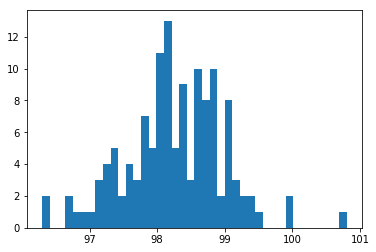

In [6]:
# Histogram of temperatures
plt.hist(df.temperature, bins=40)
plt.show()

In [7]:
# Sort data and Find observed mu and std of data
obs = df.temperature.sort_values()
mu, std = obs.mean(), obs.std()
print('mu is ', mu)
print('std is ', std)

mu is  98.24923076923076
std is  0.7331831580389453


In [8]:
# Create associated normal distribution with mu and std: p
distr = norm.pdf(obs, mu, std)

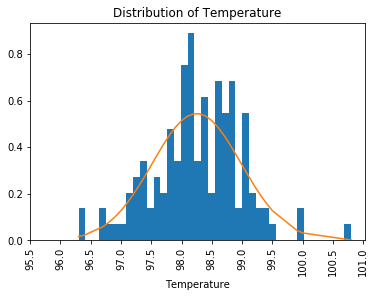

In [9]:
plt.hist(obs, bins=40, density=True, stacked=True)
plt.plot(obs, distr)
plt.xlabel('Temperature')
plt.title('Distribution of Temperature')
# xticks
xticks = plt.xticks(np.arange(95.5,101.5,0.5),rotation=90)

Let's test the fitness of this normed line to see if our data is sufficiently normal (using normaltest).

In [10]:
k2, p = scipy.stats.normaltest(obs)

In [11]:
if p < 0.05:
    print('Does not follow Normal distribution')
else:
    print('Follows Normal distribution with p-value of ', '{:1.6}'.format(str(p)))

Follows Normal distribution with p-value of  0.2587


Based on this p-value, we can assume our underlying data follows an approximate Normal distribution.

## Method #2

In this method, we will display the theoretical CDF of the normal distribution and compare it with an ECDF of our data by passing the mu and std values from the data.

In [12]:
# Define a function that computes the ECDF on a 1D array: ecdf()
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    
    # x-data for the ECDF: x
    x = np.sort(data)
    
    # y-data for the ECDF, evenly going from 1/n to n: y
    y = np.arange(1, n+1)/n
    
    return x, y

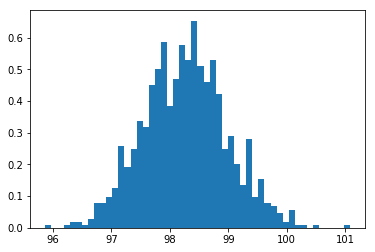

In [13]:
# Create theoretical normal distribution, using previous parameters and a sample size of 1,000. This is what our data should look like if it was truly normal.
np.random.seed(42)

normal = np.random.normal(mu, std, 1000)
plt.hist(x=normal, density=True, bins=50)
plt.show()

In [14]:
# Generate the theoretical ECDF using our parameters from normal
x_theor, y_theor = ecdf(normal)

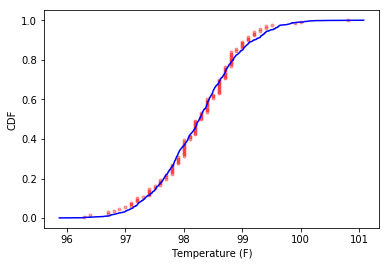

In [15]:
# Take our real data and create an ECDF with it, overlaying it with the theoretical ECDF
x, y = ecdf(obs)

# Overlay our data with the theoretical data ecdf plots
plt.plot(x, y, marker=".", linestyle='none', color='red', alpha=0.35)
plt.plot(x_theor, y_theor, color='blue')
plt.xlabel('Temperature (F)')
plt.ylabel('CDF')
plt.show()

Conclusion: The data sufficiently fits the normality test from Method #1 and from Method #2 follows a similar ECDF to that of the normal. For that, we can assume for now that this data is relatively normal and is representative of other samples, in which we can proceed with our testing.

# Q2: Is the sample size large? Are the observations independent?

In order to proceed using the CLT and the tests following that, these two assumptions must be true. Our sample size is 130 observations, which can be assumed is sufficiently large enough. Additionally, the observations should be independent as long as long as the following is true: they are not measured within the same individual, they measured in similar climates (not while it's 120 degrees out, or is the person is ill), and there is no tracable relationship between individuals and their temperatures - for instance if a mother and son have a medical condition where their temperatures are both abnormally high.

Unfortunately, there is no explanation as to how this data was collected, so all we can go off of is the data itself. In dataframes, we can assume that each row is an independent observation and record of an individual, in which case, these observations would have been collected independently.

# Q3: Is the true population mean really 98.6 degrees F?

## Approach 1:  Bootstrap Hypothesis Method

The bootstrap method is to randomly select an observation, store it in an array, and resample with replacement for a determined amount of times. This creates a bootstrap sample. A bootstrap replicate then is a statistic from a bootstrap array. If we create a determined amount of replicates, we can view the distribution of those statistic values and come up with confidence intervals and p-values to test our hypotheses.

Here, we do a bootstrap method because we are comparing our dataset with a value. Our Null hypothesis is that the true mean human body temperature is exactly 98.6 degrees F. We will assume this is true and test to see if our sample data is likely to fit within that assumption.

In [16]:
# Theoretical mean is 98.6 degrees
theor_mean = 98.6

In [17]:
# Shift our data so that the means are the same - this does not affect the variance
sample_shifted = df.temperature - np.mean(df.temperature) + theor_mean

In [18]:
# Determine the difference in the sample observation and write it in a function for later use
def diff_from_theor_mean(data, theor_mean=98.6):
    return np.mean(data) - theor_mean

diff_obs = diff_from_theor_mean(df.temperature)
diff_obs

-0.35076923076921673

In [19]:
# Now we will generate samples and replicates, performed on the shifted data since that is what's in the hypothesis test
# Generate bootstrap sample: bs_sample
np.random.seed(42)
bs_sample = np.random.choice(sample_shifted, size=len(sample_shifted))

In [20]:
# Loop to apply a function to each sample, and collect those values into replicates.
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates"""
    
    # Initialize array of replicates
    bs_replicates = np.empty(size)
    
    # Generate replications, where each replicate follows the same form as above in bs_sample
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data, len(data)))
        
    return bs_replicates

In [21]:
# Use this function to draw 10,000 samples and calculte the diff from the theoretical mean of each sample
bs_replicates = draw_bs_reps(sample_shifted, diff_from_theor_mean, size=10000)

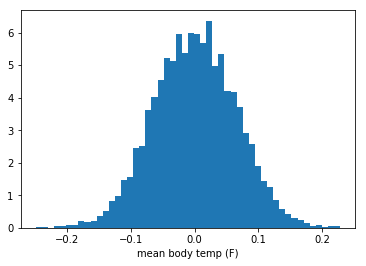

In [22]:
# See how these replicates are distributed
plt.hist(bs_replicates, bins=50, density=True)
plt.xlabel('mean body temp (F)')
plt.show()

In [23]:
bs_replicates

array([ 0.06538462,  0.04384615,  0.09923077, ..., -0.08538462,
        0.00846154,  0.12769231])

In [24]:
# Let's determine a p-value from this test
p = np.sum(bs_replicates <= diff_obs) / 10000
p

0.0

Conclusion: Since the p-value is so extremely low, that means there is a minimal fraction of observations less extreme than the test statistic. This means that it is possible that our observed data was significantly far from the assumed body temperature mean of 98.6 degrees. In other words, we must reject the null hypothesis that the sample data follows a true mean of 98.6 degrees F.

## Approach 2: Frequentist Statistical Sampling

In this case, we would use a one-sample test to determine how this sample of temperatures compares to the true population mean of 98.6 degrees F. Additionally, because our sample size is large enough, we will conduct this test using a z-statistic.
<br>
<br>
Our null hypothesis is the the true population mean ($\mu$) equals our assumed temperature of 98.6. Alternatively, the tested hypothesis is that the true population mean ($\mu$) is not 98.6. We will test with a p-value leve of 0.05. These hypotheses are denoted below:
<br>
<br>
    $H_{0}$: $\mu$ = 98.6
<br>
    $H_{a}$: $\mu$ $\neq$ 98.6

## <i>* z-statistic method</i>

In [25]:
# Calculate z-value // z = (mean - mu) / (std / sqrt(n))
z = (df.temperature.mean() - 98.6) / (df.temperature.std() / (df.temperature.size**0.5))
print('z-value = ', z)

z-value =  -5.454823292364079


In [26]:
# Calculate the p-value of this z-score, a two-sided test
import scipy.stats as stats
p_val_z = stats.norm.cdf(z) * 2
print('p-value is ', p_val_z)

if p_val_z < 0.05:
    print('We reject the null hypothesis that the true population mean is 98.6 F.')
else:
    print('We fail to reject the null hypothesis that the true population mean is 98.6 F.')


p-value is  4.90215701411338e-08
We reject the null hypothesis that the true population mean is 98.6 F.


## <i>* t-statistic method</i>

In [27]:
# Calculate t-value // t = (mean - mu) / (sample std / sqrt(n))
t = (df.temperature.mean() - 98.6) / (df.temperature.std() / (df.temperature.size**0.5))
print('t-value = ', t)

t-value =  -5.454823292364079


In [28]:
# Critical t-score
# Define parameters
p = 0.95
dof = (df.shape[0]) - 1

# Find value, 2-tail
critical_t = stats.t.ppf((p + (1-p)/2), dof)
print(critical_t)

1.978524491458605


In [29]:
p_val_t = stats.t.cdf(t, df = dof) * 2
print('p-value is ', p_val_t)

if p_val_t < 0.05:
    print('We reject the null hypothesis that the true population mean is 98.6 F.')
else:
    print('We fail to reject the null hypothesis that the true population mean is 98.6 F.')

p-value is  2.4106320415609943e-07
We reject the null hypothesis that the true population mean is 98.6 F.


Since we have over 30 observations, it makes sense that we come to the same conlcusion whether we use the z or t test, which makes sense.

# Q4: Draw a small sample of size 10 from the data and repeat both frequentist tests.

In [30]:
np.random.seed(42)
small_sample = df.sample(10)
print(small_sample)

     temperature gender  heart_rate
55          98.6      F        82.0
40          98.4      F        79.0
19          99.4      M        70.0
31          97.6      F        61.0
115         98.0      M        64.0
56          98.8      F        70.0
69          98.9      M        80.0
105         96.7      M        71.0
81          98.0      M        67.0
26          97.8      F        62.0


## <i>* z-statistic method (small_sample)</i>

In [31]:
# Calculate small z-value
small_z = (small_sample.temperature.mean() - 98.6) / (small_sample.temperature.std() / (small_sample.temperature.size**0.5))
print('z-value = ', small_z)

# Find p-value of test
p_val_small_z = stats.norm.cdf(small_z) * 2
print('p-value is ', p_val_small_z)

if p_val_small_z < 0.05:
    print('We reject the null hypothesis that the true population mean is 98.6 F.')
else:
    print('We fail to reject the null hypothesis that the true population mean is 98.6 F.')


z-value =  -1.5606191828511506
p-value is  0.11861362990253155
We fail to reject the null hypothesis that the true population mean is 98.6 F.


## <i>* t-statistic method (small_sample)</i>

In [32]:
# Calculate small t-value
small_t = (small_sample.temperature.mean() - 98.6) / (small_sample.temperature.std() / (small_sample.temperature.size**0.5))
print('t-value = ', small_t)

# Find critical t-score
# Define parameters
p = 0.95
small_dof = (small_sample.shape[0]) - 1

# Find value, 2-tail
critical_t = stats.t.ppf((p + (1-p)/2), small_dof)
print('critical t-score is ', critical_t)

# Find p-value of test
p_val_small_t = stats.t.cdf(small_t, df = small_dof) * 2
print('p-value is ', p_val_small_t)

if p_val_small_t < 0.05:
    print('We reject the null hypothesis that the true population mean is 98.6 F.')
else:
    print('We fail to reject the null hypothesis that the true population mean is 98.6 F.')

t-value =  -1.5606191828511506
critical t-score is  2.2621571627409915
p-value is  0.15304624869561903
We fail to reject the null hypothesis that the true population mean is 98.6 F.


In this example with only 10 samples, it is not appropriate to use the z-score method because of so few samples present. You can see that we get completely different p-values, and that is because using the t-score method accounts for much more of the unknown variance in the small set of data.

# Q5: At what temperature should we consider someone's temperature to be "abnormal"?

Let's assume we consider someone's temperature to be abnormal at the point that they are farther than 3 standard deviations from the mean. If the underlying data follows a Normal distribution as we assumed before, that means that an abnormal temperature would not fall within the 99.7% of observed values according to the 68-95-99.7 rule.
<br>
<br>
Again, we will use the z-score approach since we have 130 observations. Additionally, the formula to calculate margin of error (moe) is z*(std/sqrt(n)).

## Abnormal Temperature (Bootstrap Method)

In [33]:
# Calculate margin of error from prior bootstrap work
critical_z = stats.norm.ppf(0.975) # 95% confidence
moe_bs = critical_z*df.temperature.std()/(df.temperature.size**0.5)
print(moe_bs)

0.1260343410491174


In [34]:
# Calculate confidence interval for bootstrap method
ci_bs_min = df.temperature.mean() - moe_bs
ci_bs_max = df.temperature.mean() + moe_bs
print('Confidence Interval from ', round(ci_bs_min,2), 'F to ', round(ci_bs_max, 2), 'F. Anything outside of this range would be deemed abnormal.')

Confidence Interval from  98.12 F to  98.38 F. Anything outside of this range would be deemed abnormal.
